In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:


data = pd.read_csv("/kaggle/input/thyroid-disease-data/thyroidDF.csv")
data.info



<bound method DataFrame.info of       age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0

In [3]:
data.dropna(inplace=True)

In [4]:
data['sex'] = data['sex'].map({'M': 1, 'F': 0})
data['on_thyroxine'] = data['on_thyroxine'].map({'t': 1, 'f': 0})
data['query_on_thyroxine'] = data['query_on_thyroxine'].map({'t': 1, 'f': 0})
data['on_antithyroid_meds'] = data['on_antithyroid_meds'].map({'t': 1, 'f': 0})
data['sick'] = data['sick'].map({'t': 1, 'f': 0})
data['pregnant'] = data['pregnant'].map({'t': 1, 'f': 0})
data['thyroid_surgery'] = data['thyroid_surgery'].map({'t': 1, 'f': 0})
data['I131_treatment'] = data['I131_treatment'].map({'t': 1, 'f': 0})
data['query_hypothyroid'] = data['query_hypothyroid'].map({'t': 1, 'f': 0})
data['query_hyperthyroid'] = data['query_hyperthyroid'].map({'t': 1, 'f': 0})
data['lithium'] = data['lithium'].map({'t': 1, 'f': 0})
data['goitre'] = data['goitre'].map({'t': 1, 'f': 0})
data['tumor'] = data['tumor'].map({'t': 1, 'f': 0})
data['hypopituitary'] = data['hypopituitary'].map({'t': 1, 'f': 0})
data['psych'] = data['psych'].map({'t': 1, 'f': 0})
data['TSH_measured'] = data['TSH_measured'].map({'t': 1, 'f': 0})
data['T3_measured'] = data['T3_measured'].map({'t': 1, 'f': 0})
data['TT4_measured'] = data['TT4_measured'].map({'t': 1, 'f': 0})
data['T4U_measured'] = data['T4U_measured'].map({'t': 1, 'f': 0})
data['FTI_measured'] = data['FTI_measured'].map({'t': 1, 'f': 0})
data['TBG_measured'] = data['TBG_measured'].map({'t': 1, 'f': 0})
data['referral_source'] = data['referral_source'].map({'SVI': 1, 'other': 0})
data['target'] = data['target'].map({
    '-': 0,
    'S': 1,
    'F': 2,
    'AK': 3,
    'R': 4,
    'I': 5,
    'M': 6,
    'N': 7,
    'G': 8,
    'K': 9,
    'A': 10,
    'KJ': 11,
    'L': 12,
    'MK': 13,
    'Q': 14,
    'J': 15,
    'C|I': 16,
    'O': 17,
    'LJ': 18,
    'H|K': 19,
    'D': 20,
    'GK': 21,
    'MI': 22,
    'P': 23,
    'FK': 24,
    'B': 25,
    'GI': 26,
    'C': 27,
    'GKJ': 28,
    'OI': 29,
    'D|R': 30,
    'E': 31
})

In [5]:


data = data.drop('patient_id',axis=1)



In [6]:

# Diviser les données en features et target
X = data.drop(columns=['target'])
y = data['target']

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)
y_pred = cross_val_predict(dt_classifier, X, y, cv=5)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [7]:
conf_matrix = confusion_matrix(y, y_pred)
# Calcul des mesures de performance à partir de la matrice de confusion
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Calcul de la précision
precision = TP / (TP + FP)

# Calcul du rappel
recall = TP / (TP + FN)

# Calcul du F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calcul de l'exactitude
accuracy = (TN + TP) / (TN + FP + FN + TP)


* DECISION TREE RESULTS (Cross Validation) :
Accuracy: 0.9230769230769231
Précision: 1.0
Recall: 0.9230769230769231
F1 Score: 0.9600000000000001


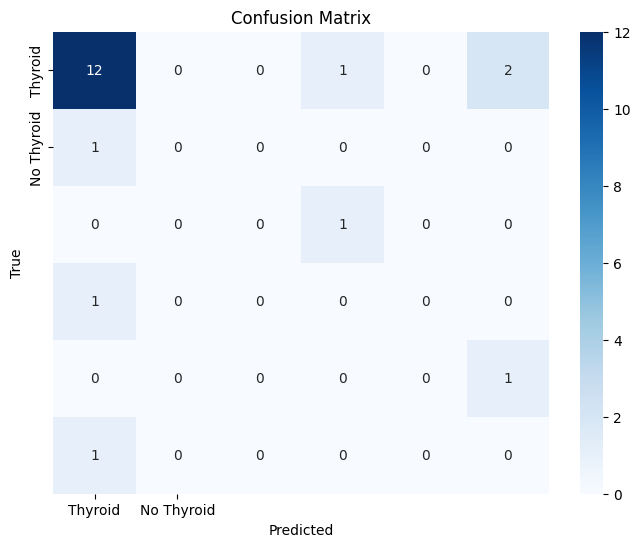

In [8]:
# Affichage des mesures de performance
print("* DECISION TREE RESULTS (Cross Validation) :")
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Afficher l'arbre de décision
'''plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Thyroid', 'Thyroid'], filled=False, fontsize=5, max_depth=3)
plt.title("Decision Tree")
plt.show()
'''
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Thyroid', 'No Thyroid'], yticklabels=['Thyroid', 'No Thyroid'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
TP

12

In [10]:
TN

0

In [11]:
FP

0

In [12]:
FN

1

In [13]:
conf_matrix

array([[12,  0,  0,  1,  0,  2],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0]])

In [14]:
y

167     2
5256    0
6044    0
6045    0
6747    9
6773    0
6862    0
6863    0
6880    0
6934    0
7097    0
7101    0
7103    0
7190    0
7239    5
7254    0
7356    0
7591    0
7733    8
8116    7
Name: target, dtype: int64

In [15]:
data['target'].unique()

array([2, 0, 9, 5, 8, 7])